## Problema (Sistema de agrupacion de casas)

Queremos poder clasificar las casas segun sus religion e ingreso medio.

Para ello, utilizaremos el famoso conjunto de datos de viviendas de California. Fue construido utilizando datos del denso de California de 1990. Contiene una fila por grupo de bloques censales.

Un grupo de bloques es la unidad geografica mas peque;a para la cual se publican datos del censo de EE.UU.




## Paso 1 (Caragar el set de datos)

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

sns.set_theme()

In [81]:
data = pd.read_csv('../data/raw/housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
# Solo usaremos las columnas `Latitude`, `Longitude` and `MedInc`
data = data[['MedInc', 'Latitude', 'Longitude']]

### Dividimos el Conjunto de datos en Entrenamiento y Prueba

In [83]:
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)

## Paso 2 (Build a K-Means)

In [84]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [85]:
# Almacenamos el cluster al que pertenece cada casa como una nueva columna en el conjunto de datos
y_train = model.labels_
X_train['cluster'] = y_train

In [86]:
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


### Representamos los datos en un dot plot

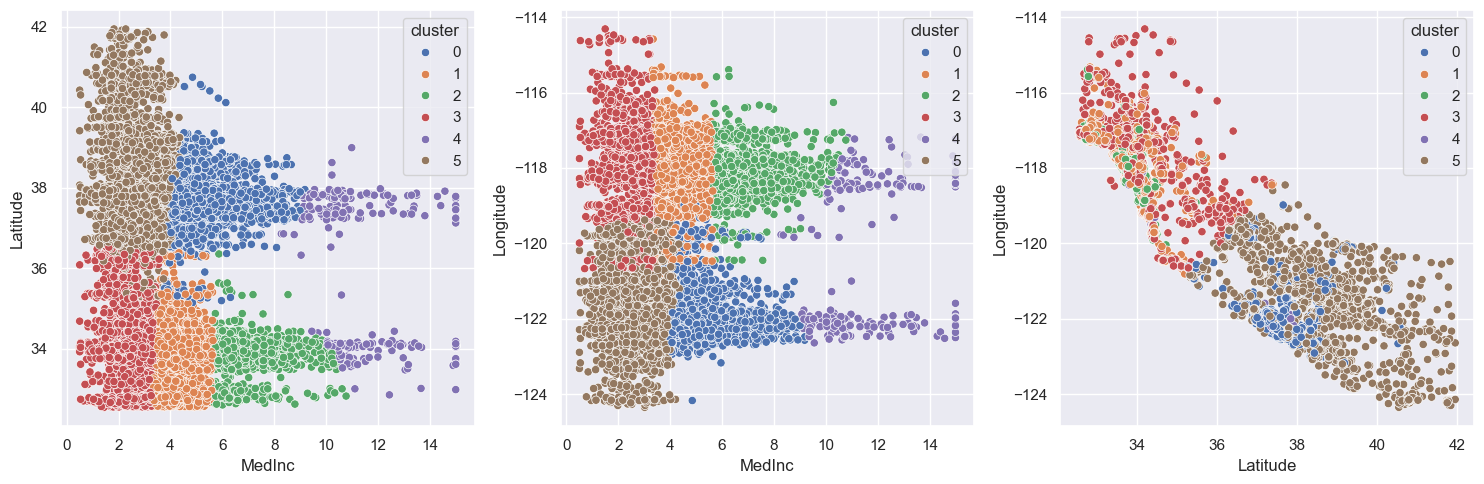

In [87]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(data = X_train, ax = axes[0], x = 'MedInc', y = 'Latitude', hue = 'cluster', palette = 'deep')
sns.scatterplot(data = X_train, ax = axes[1], x = 'MedInc', y = 'Longitude', hue = 'cluster', palette = 'deep')
sns.scatterplot(data = X_train, ax = axes[2], x = 'Latitude', y = 'Longitude', hue = 'cluster', palette = 'deep')

plt.tight_layout()
plt.show()

## Paso 3 (Predecir con el conjunto de datos de prueba)

In [88]:
y_test = list(model.predict(X_test))
X_test['cluster'] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


### Comparamos los resultados de X_train con X_test en un scatterplot

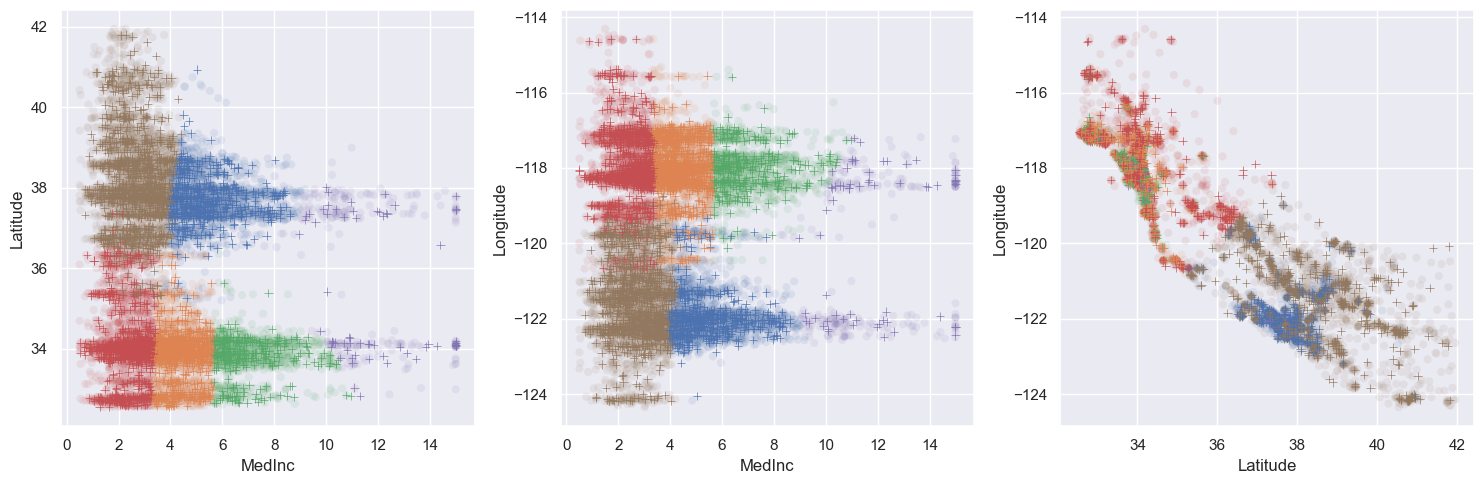

In [94]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(data = X_train, ax = axes[0], x = 'MedInc', y = 'Latitude', hue = 'cluster', legend = False, palette = 'deep', alpha = 0.1)
sns.scatterplot(data = X_train, ax = axes[1], x = 'MedInc', y = 'Longitude', hue = 'cluster', legend = False, palette = 'deep', alpha = 0.1)
sns.scatterplot(data = X_train, ax = axes[2], x = 'Latitude', y = 'Longitude', hue = 'cluster', legend = False, palette = 'deep', alpha = 0.1)

sns.scatterplot(data = X_test, ax = axes[0], x = 'MedInc', y = 'Latitude', hue = 'cluster', palette = 'deep', marker = '+', legend = False)
sns.scatterplot(data = X_test, ax = axes[1], x = 'MedInc', y = 'Longitude', hue = 'cluster', palette = 'deep', marker = '+', legend = False)
sns.scatterplot(data = X_test, ax = axes[2], x = 'Latitude', y = 'Longitude', hue = 'cluster', palette = 'deep', marker = '+', legend = False)

plt.tight_layout()
plt.show()

## Paso 4 (Entrenamos un modelo supervisado)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [96]:
# Creamos el modelo
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Entrenamos el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
# Prediccion
y_pred = clf.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1])

In [100]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [101]:
print(f'Accuracy: {accuracy}')
print('Classification Report: ')
print(report)

Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       983
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



### Para visualizar los resultados usare Matriz de Confusion

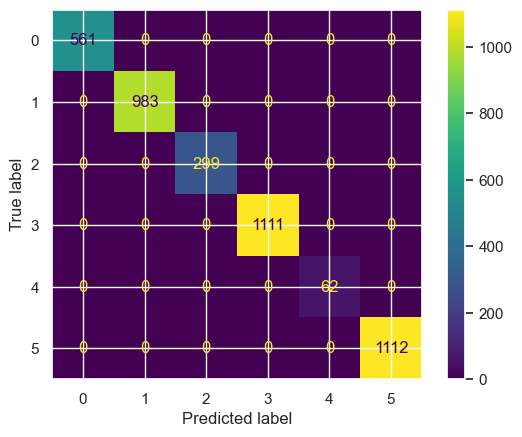

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

## Paso 5 (Guardar los modelos)

In [104]:
from pickle import dump

dump(clf, open('../models/random_forest_classifier_n_estimator-100_default-42.sav', 'wb'))
dump(model, open('../models/k-means_default-42.sav', 'wb'))